In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# For Clustering Analysis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
merged_data = pd.read_csv('https://github.com/edeliciouso/Predicting-Yields-for-Potatoes/blob/main/MergedDataFinal4.csv?raw=true')
merged_data = merged_data.drop(['Item', 'Year'], axis = 1)
merged_data

,Country,Yield (100 hg/ha),Pesticides (Tons),Rainfall (mm),Fertilizer (kg/ha)
0,Albania,55693,410.55,1485.0,79.08
1,Albania,66790,590.50,1485.0,76.47
2,Albania,59869,582.68,1485.0,87.08
3,Albania,67290,361.62,1485.0,82.79
4,Albania,69533,450.60,1485.0,78.15
...,...,...,...,...,...
1194,Zimbabwe,5803,2185.07,657.0,19.17
1195,Zimbabwe,4405,2185.07,657.0,31.78
1196,Zimbabwe,13933,2185.07,657.0,35.71
1197,Zimbabwe,13506,2185.07,657.0,32.39


In [3]:
# Select features (independent variables) and target variable (dependent variable)
features = merged_data[['Pesticides (Tons)', 'Rainfall (mm)', 'Fertilizer (kg/ha)', 'Country']]
target = merged_data['Yield (100 hg/ha)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [4]:
# Create transformers for numeric and categorical features
numeric_features = ['Pesticides (Tons)', 'Rainfall (mm)', 'Fertilizer (kg/ha)']
categorical_features = ['Country']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [5]:
# Training the DecisionTreeRegressor model
start_training_time_dt = time.time()
model.fit(X_train, y_train)
end_training_time_dt = time.time()
training_time_dt = end_training_time_dt - start_training_time_dt

# Make predictions
start_prediction_time_dt = time.time()
y_pred = model.predict(X_test)
end_prediction_time_dt = time.time()
prediction_time_dt = end_prediction_time_dt - start_prediction_time_dt

In [6]:
# Evaluate the model
r2_dt = r2_score(y_test, y_pred)  # R^2
mae_dt = mean_absolute_error(y_test, y_pred)  # mean absolute error
mse_dt = mean_squared_error(y_test, y_pred)  # mean squared error
rmse_dt = mean_squared_error(y_test, y_pred, squared=False)  # root mean squared error
max_err_dt = max_error(y_test, y_pred)  # max error
mape_dt = mean_absolute_percentage_error(y_test, y_pred)  # mean absolute percentage error

print(f"Decision Tree Regression Metrics:")
print(f"R-squared (R2): {r2_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Max Error: {max_err_dt:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_dt:.2f}%")
print(f"Training Time: {training_time_dt:.2f} seconds")
print(f"Prediction Time: {prediction_time_dt:.5f} seconds")

Decision Tree Regression Metrics:
R-squared (R2): 0.88
Mean Absolute Error (MAE): 6466.67
Mean Squared Error (MSE): 133141036.20
Root Mean Squared Error (RMSE): 11538.68
Max Error: 111094.14
Mean Absolute Percentage Error (MAPE): 0.16%
Training Time: 0.05 seconds
Prediction Time: 0.00806 seconds


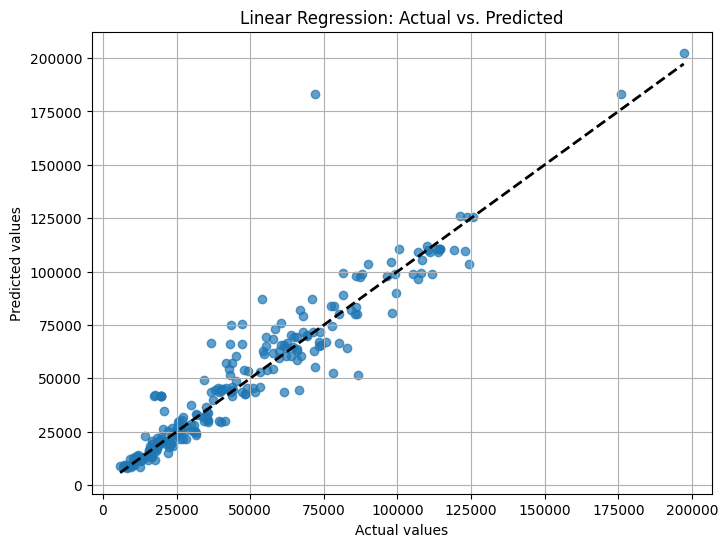

In [7]:
# Visualize predicted vs actual values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

In [8]:
# Extract feature names after one-hot encoding
feature_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)

# Get all feature names (numeric and one-hot encoded)
all_feature_names = numeric_features + list(feature_names)

# Extract coefficients from the linear regression model
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame to display feature names and coefficients
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Display the feature importance DataFrame
print(feature_importance_df)

                Feature   Coefficient
0     Pesticides (Tons)   6154.021225
1         Rainfall (mm)  -2423.804161
2    Fertilizer (kg/ha)  -5146.740646
3       Country_Algeria -44697.304307
4        Country_Angola -62701.044383
..                  ...           ...
106      Country_Uganda -46794.492998
107     Country_Ukraine -17494.530721
108     Country_Uruguay -12240.460825
109      Country_Zambia -44536.252384
110    Country_Zimbabwe -63802.410519

[111 rows x 2 columns]
